Text(10,579168,'uncompressed input size')

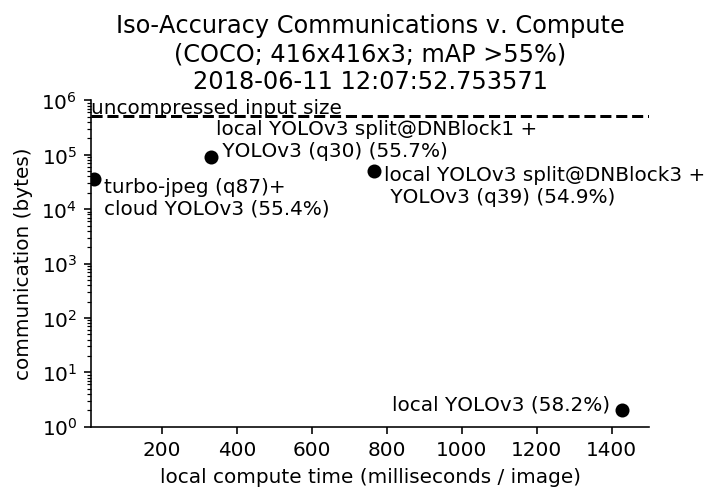

In [73]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import matplotlib.pyplot as plt
import math 
import datetime

# files = ['simplenet9', 'resnet18', 'mobilenetv2.1000']
# paths = list(map(lambda x : os.path.join(DATA_PREFIX, x, 'training_log.csv'), files))
# data = no_plot_summarize_accuracy(paths)

x_compute = list(map(lambda x: x, [17.5, 331, 766, 1427]))
y_network = [35729.15, 91643.54, 49568.14, 2.0]
#label = ['turbo-jpeg (q78)+\ncloud YOLOv3 (94.3%)', 'YOLOv3 (56%)']

fig = plt.figure(figsize=(5, 3))
fig.clear()

ax1 = fig.add_subplot(111)
ax1.set_xlim([10, 1500])
ax1.set_ylim([1,10**6])
ax1.set_title('Iso-Accuracy Communications v. Compute\n(COCO; 416x416x3; mAP >55%)\n{}'.format(datetime.datetime.now()
))
ax1.set_ylabel('communication (bytes)')
ax1.set_xlabel('local compute time (milliseconds / image)')
#ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
l1 = ax1.plot(x_compute, y_network, color="#000000", ls='', marker="o")

# for l,i,j in zip(label,x_compute,y_network):
#     ax1.annotate('  '+l, xy=(i,j), rotation=45, xytext=(-5,150), textcoords='offset pixels')
# ax1.annotate('simple9_thin (92.75%)', xy=(6.01, 2.0), rotation=45, xytext=(-5,165), textcoords='offset pixels')
# ax1.annotate('simple9 (94.3%)', xy=(14.9, 2.0), rotation=45, xytext=(-5,125), textcoords='offset pixels')
ax1.annotate('turbo-jpeg (q87)+\ncloud YOLOv3 (55.4%)', xy=(17.5, 35729.15), xytext=(10,-35), textcoords='offset pixels')
ax1.annotate('local YOLOv3 split@DNBlock1 +\n YOLOv3 (q30) (55.7%)', xy=(331, 91643.54), xytext=(5,0), textcoords='offset pixels')
ax1.annotate('local YOLOv3 split@DNBlock3 +\n YOLOv3 (q39) (54.9%)', xy=(766, 46823.62), xytext=(10,-30), textcoords='offset pixels')
ax1.annotate('local YOLOv3 (58.2%)', xy=(1427, 2.0), xytext=(-230,0), textcoords='offset pixels')
    
ax1.plot([10,10000], [416*416*3, 416*416*3], color="#000000", ls='--')
ax1.annotate('uncompressed input size',xy=(10,416*416*3+60000))